# **Importar librerías**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd


# **Cargar datos**

In [ ]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Después de describir nuestro dataset, se puede notar que los datos son numéricos y de cadena.

# **Verificar y Limpiar de datos**

Verificar si los valores nulos del dataset, para eso se usa el método .isna().

In [ ]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Eliminar características innecesarias**

In [ ]:
df = df.drop(['waterfront','view','id'],axis=1)

# **Comprobar el tipo de datos**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


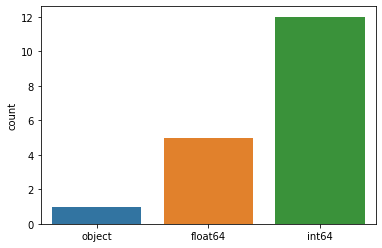

In [ ]:
sns.countplot(df.dtypes.map(str))

# **Hallar X, Y**

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [ ]:
X= df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built','yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [ ]:
y = df['price']

# **Dividir el dataset en training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print("Datos de entrenamiento",X_train.shape, y_train.shape)
print("Datos de prueba",X_test.shape, y_test.shape)


Datos de entrenamiento (15129, 16) (15129,)
Datos de prueba (6484, 16) (6484,)


# **Transformar los datos**

In [ ]:
means = X_train.mean(axis=0)
means

bedrooms             3.365721
bathrooms            2.111838
sqft_living       2073.583713
sqft_lot         14992.260030
floors               1.500330
condition            3.407628
grade                7.653249
sqft_above        1786.334655
sqft_basement      287.249058
yr_built          1971.197369
yr_renovated        82.445436
zipcode          98078.018508
lat                 47.560591
long              -122.214250
sqft_living15     1982.141318
sqft_lot15       12823.633089
dtype: float64

In [ ]:
# aprendamos ahora los valores mínimo y máximo, y el rango de valores 

ranges = X_train.max(axis=0)- X_train.min(axis=0)
ranges

bedrooms         3.300000e+01
bathrooms        8.000000e+00
sqft_living      1.176000e+04
sqft_lot         1.164274e+06
floors           2.500000e+00
condition        4.000000e+00
grade            1.200000e+01
sqft_above       8.570000e+03
sqft_basement    4.820000e+03
yr_built         1.150000e+02
yr_renovated     2.015000e+03
zipcode          1.980000e+02
lat              6.183000e-01
long             1.204000e+00
sqft_living15    5.811000e+03
sqft_lot15       8.705490e+05
dtype: float64

In [ ]:
#ahora estamos listos para realizar la normalización de la media
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_train - means) / ranges

In [ ]:
np.round(X_train.describe(), 1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0
mean,3.4,2.1,2073.6,14992.3,1.5,3.4,7.7,1786.3,287.2,1971.2,82.4,98078.0,47.6,-122.2,1982.1,12823.6
std,0.9,0.8,911.7,39440.6,0.5,0.7,1.2,827.3,438.7,29.4,397.2,53.3,0.1,0.1,683.7,27309.0
min,0.0,0.0,290.0,520.0,1.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,3.0,1.5,1420.0,5004.0,1.0,3.0,7.0,1200.0,0.0,1952.0,0.0,98033.0,47.5,-122.3,1480.0,5089.0
50%,3.0,2.2,1910.0,7575.0,1.5,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7609.0
75%,4.0,2.5,2550.0,10631.0,2.0,4.0,8.0,2200.0,560.0,1997.0,0.0,98117.0,47.7,-122.1,2360.0,10063.0
max,33.0,8.0,12050.0,1164794.0,3.5,5.0,13.0,8860.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


In [ ]:
np.round(X_train_scaled.describe(), 1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0,15129.0
mean,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
std,0.0,0.1,0.1,0.0,0.2,0.2,0.1,0.1,0.1,0.3,0.2,0.3,0.2,0.1,0.1,0.0
min,-0.1,-0.3,-0.2,-0.0,-0.2,-0.6,-0.6,-0.2,-0.1,-0.6,-0.0,-0.4,-0.6,-0.3,-0.3,-0.0
25%,-0.0,-0.1,-0.1,-0.0,-0.2,-0.1,-0.1,-0.1,-0.1,-0.2,-0.0,-0.2,-0.1,-0.1,-0.1,-0.0
50%,-0.0,0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.0,-0.1,0.0,-0.0,-0.1,0.0,-0.0,-0.0,-0.0
75%,0.0,0.0,0.0,-0.0,0.2,0.1,0.0,0.0,0.1,0.2,-0.0,0.2,0.2,0.1,0.1,-0.0
max,0.9,0.7,0.8,1.0,0.8,0.4,0.4,0.8,0.9,0.4,1.0,0.6,0.4,0.7,0.7,1.0


# **Ingeniería de características**

In [ ]:
df['price'].mean()

540088.1417665294

In [ ]:
def valoresCluster (cost):
    if cost > 540088.1417665294:
        return 1
    else:
        return 0
df['Cluster']=df['price'].apply(valoresCluster)

In [ ]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0
